# Μαγιά και Ζύμωση


* Περιλαμβάνει προσαρμοσμένο υλικό από το *Machine Learning: A Probabilistic Perspective*, του Kevin P. Murphy, 2012, MIT Press.


---

> Πάνος Λουρίδας, Αναπληρωτής Καθηγητής <br />
> Τμήμα Διοικητικής Επιστήμης και Τεχνολογίας <br />
> Οικονομικό Πανεπιστήμιο Αθηνών <br />
> louridas@aueb.gr


* Τα δεδομένα που θα χρησιμοποιήσουμε προέρχονται από το <https://github.com/probml/pmtk3/tree/master/data/yeastData310>.

* Αυτά είναι (κατά πάσα πιθανότητα) υποσύνολο των δεδομένων της έρευνας που αναφέρεται στο <https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE28>, Joseph L. Derisi, Vishwanath R. Iyer, Patrick O. Brown (1997) Exploring the Metabolic and Genetic Control of Gene Expression on a Genomic Scale, Science, Vol 278, Issue 5338, 680-686.

* Οι στήλες αφορούν την έκφραση ή καταστολή (expression, repression) γονιδίων σε συγκεκριμένες ώρες από την αρχή της παρατήρησης. 

In [1]:
import pandas as pd

yeast = pd.read_csv('yeastData310.csv')
yeast

,gene,0.0,9.5,11.5,13.5,15.5,18.5,20.5
0,YAL012W,0.157,0.175,0.467,-0.379,-0.520,-1.279,-2.125
1,YAL034C,-0.235,0.487,-0.184,-0.669,-1.006,2.369,2.611
2,YAL061W,-0.532,0.028,-0.333,-0.102,1.172,2.087,0.992
3,YBR048W,0.224,0.274,-0.002,-0.211,-0.760,-1.524,-2.145
4,YBR052C,0.049,0.105,0.650,1.310,0.917,2.401,1.715
...,...,...,...,...,...,...,...,...
305,YPL273W,0.151,0.326,2.672,0.075,0.487,-1.092,-1.306
306,YPR136C,0.158,-0.130,-0.880,-0.693,-1.020,-2.387,-1.009
307,YPR156C,0.074,0.535,1.603,1.461,1.580,0.933,2.044
308,YPR184W,-0.195,0.165,-0.333,0.421,0.858,1.633,3.028


* Για να πάρουμε μια ιδέα, μπορούμε να φτιάξουμε μια γραφική παράσταση με την εξέλιξη για κάθε γονίδιο ξεχωριστά.

* Δεν θα χρησιμοποιήσουμε την πρώτη στήλη του `DataFrame` (που ταυτοποιεί το ίδιο το γονίδιο).

<Figure size 1000x800 with 0 Axes>

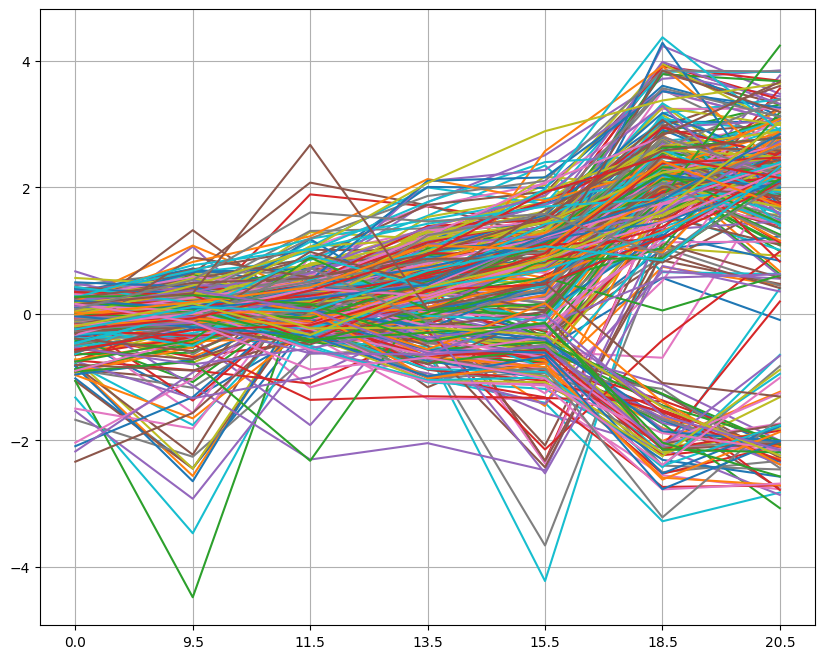

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
gene_exp = yeast.iloc[:, 1:]
gene_exp.T.plot(figsize=(10, 8), legend=None)
plt.grid()

* Για τον εντοπισμό του βέλτιστου αριθμού των συστάδων ξεκινάμε με τη μέθοδο του αγκώνα.

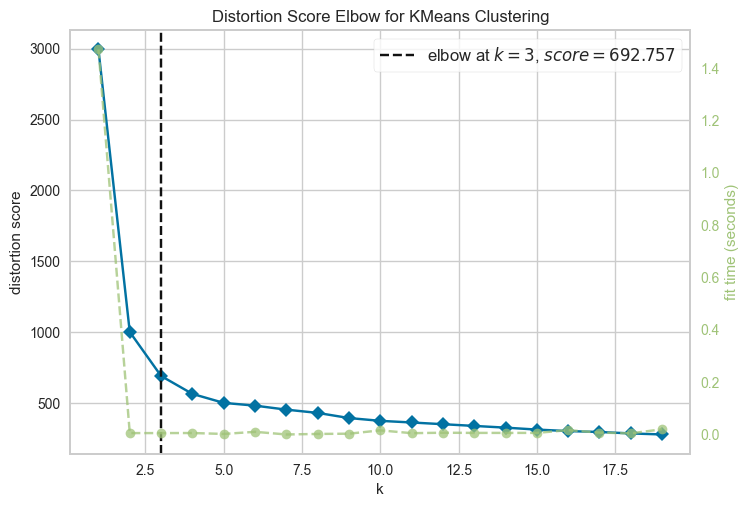

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [3]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=0)
visualizer = KElbowVisualizer(kmeans, k=(1,20))

visualizer.fit(gene_exp)
visualizer.show()

* Μπορούμε να δούμε τι μας δίνει και η ανάλυση σιλουέτας.

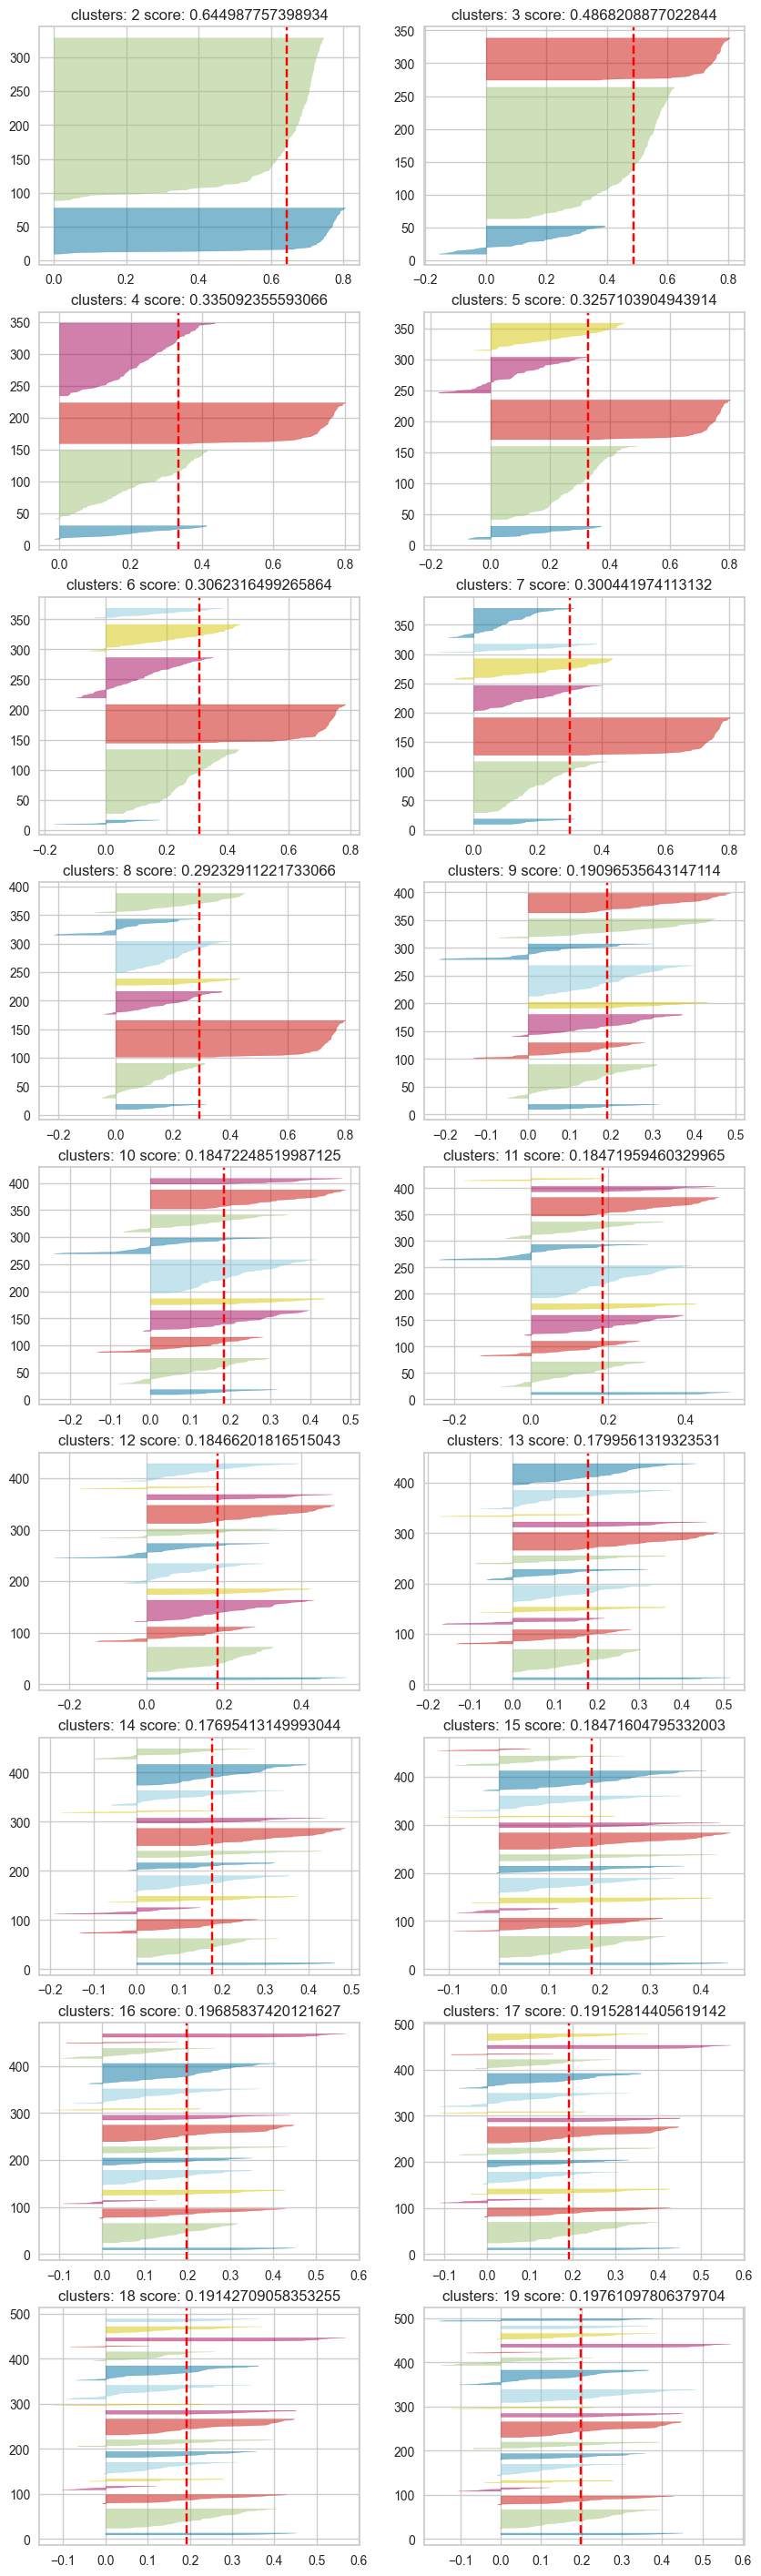

In [4]:
from yellowbrick.cluster import SilhouetteVisualizer

plt.figure(figsize=(2 * 5,  10 * 4))

scores = {}
for n_clusters in range(2, 20):
    plt.subplot(10, 2, n_clusters - 1)
    kmeans = KMeans(n_clusters, random_state=42)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(gene_exp)
    scores[n_clusters] = visualizer.silhouette_score_
    plt.title(f'clusters: {n_clusters} score: {visualizer.silhouette_score_}')

* Ο βέλτιστος αριθμός τώρα είναι δύο, διαφορετικός από αυτόν που δίνει η μέθοδος του αγκώνα...

In [5]:
sorted(scores.items(), key=lambda kv: kv[1], reverse=True)

[(2, 0.644987757398934),
 (3, 0.4868208877022844),
 (4, 0.335092355593066),
 (5, 0.3257103904943914),
 (6, 0.3062316499265864),
 (7, 0.300441974113132),
 (8, 0.29232911221733066),
 (19, 0.19761097806379704),
 (16, 0.19685837420121627),
 (17, 0.19152814405619142),
 (18, 0.19142709058353255),
 (9, 0.19096535643147114),
 (10, 0.18472248519987125),
 (11, 0.18471959460329965),
 (15, 0.18471604795332003),
 (12, 0.18466201816515043),
 (13, 0.1799561319323531),
 (14, 0.17695413149993044)]

* Θα χρησιμοποιήσουμε τον αλγόριθμο k-means για δύο συστάδες.

In [6]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(gene_exp)

* Αφού οι μετρήσεις γίνονται στη διάρκεια του χρόνου, μπορούμε να απεικονίσουμε διαγραμματικά τις συστάδες ως χρονικές εξελίξεις, με βάση το κεντροειδές της κάθε συστάδας.

* Κάθε κεντροειδές δίνει την τιμή της έκφρασης για μια συγκεκριμένη χρονική στιγμή (διάσταση).

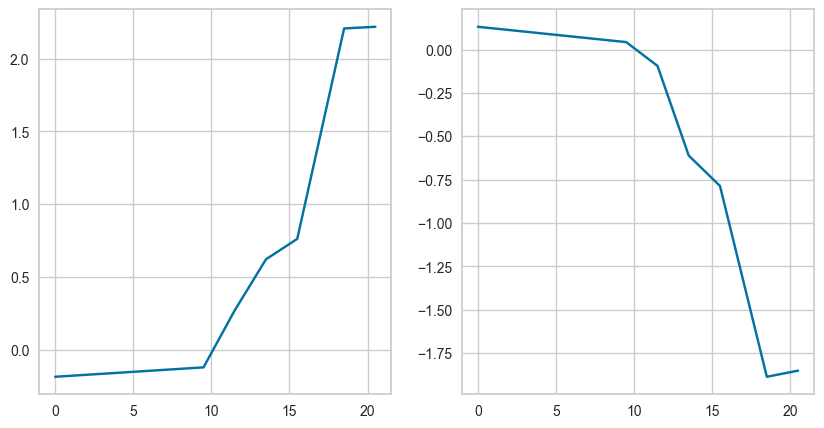

In [7]:
plt.figure(figsize=(2 * 5, 1 * 5))
xs = [ float (x) for x in gene_exp.columns ]
for i, cluster_centers in enumerate(kmeans.cluster_centers_):
    plt.subplot(1, 2, i + 1)
    plt.plot(xs, cluster_centers)

* Ας δοκιμάσουμε και με τρεις συστάδες.

In [8]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(gene_exp)

* Και οι συστάδες στην εξέλιξη του χρόνου.

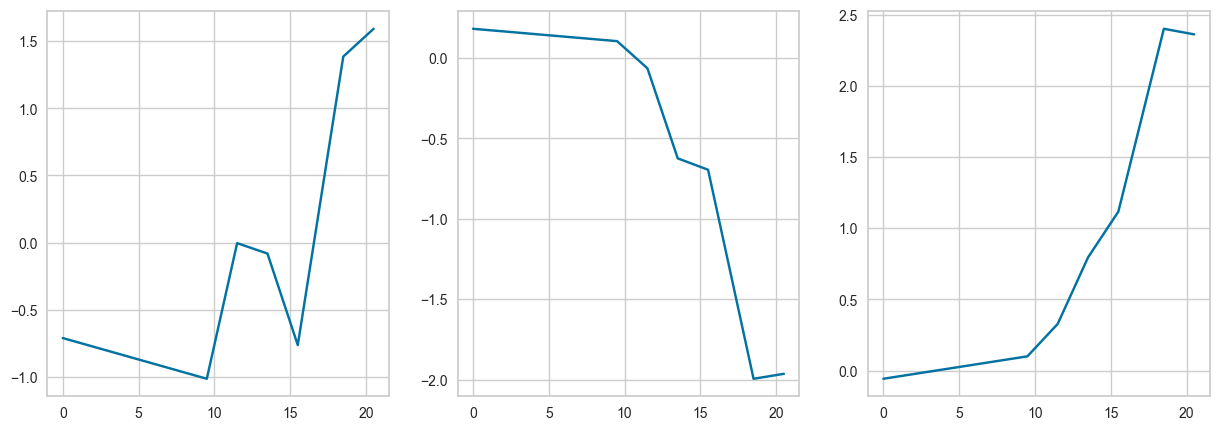

In [9]:
plt.figure(figsize=(3 * 5, 1 * 5))
xs = [ float (x) for x in gene_exp.columns ]
for i, cluster_centers in enumerate(kmeans.cluster_centers_):
    plt.subplot(1, 3, i + 1)
    plt.plot(xs, cluster_centers)


* Πάμε σε ένα άλλο είδος ζύμωσης, την αλκοολική.

* Θα χρησιμοποιήσουμε τα δεδομένα για τα κρασιά από την Πορτογαλία που έχουμε δει και προηγουμένως.

In [10]:
wines = pd.read_csv("wines_color.csv")
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color
0,5.5,0.32,0.13,1.30,0.037,45.0,156.0,0.99184,3.26,0.38,10.7,0
1,7.8,0.76,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
2,6.3,0.23,0.22,3.75,0.039,37.0,116.0,0.99270,3.23,0.50,10.7,0
3,5.9,0.32,0.20,14.40,0.050,29.0,144.0,0.99666,3.24,0.41,10.3,0
4,5.7,0.16,0.32,1.20,0.036,7.0,89.0,0.99111,3.26,0.48,11.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.9,0.26,0.41,15.15,0.040,38.0,216.0,0.99760,2.96,0.60,10.0,0
6493,6.5,0.18,0.33,1.40,0.029,35.0,138.0,0.99114,3.36,0.60,11.5,0
6494,6.3,0.76,0.00,2.90,0.072,26.0,52.0,0.99379,3.51,0.60,11.5,1
6495,10.2,0.41,0.43,2.20,0.110,11.0,37.0,0.99728,3.16,0.67,10.8,1


* Θα δούμε αν μπορούμε να βρούμε δύο συστάδες, και αν αυτές αντιστοιχούν στο χρώμα του κρασιού.

In [11]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
wines_scaled = standard_scaler.fit_transform(wines.loc[:, 'fixed acidity':'alcohol'])
kmeans = KMeans(n_clusters=2, random_state=0).fit(wines_scaled)

* Για να οπτικοποιήσουμε τις συστάδες, θα χρησιμοποιήσουμε τη γνώριμή μας μέθοδο PCA.

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
wines_transformed = pca.fit_transform(wines_scaled)

* Ιδού πως έχει η κατάσταση.

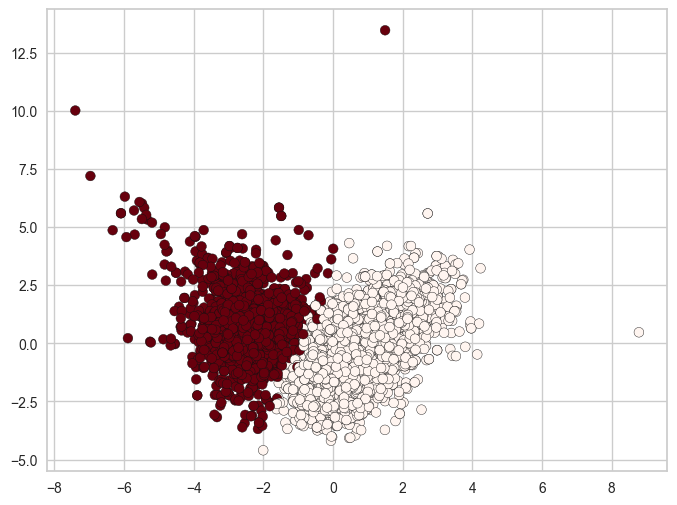

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(x=wines_transformed[:,0], y=wines_transformed[:,1], c=kmeans.labels_, 
            edgecolor='k', cmap='Reds')
plt.grid(visible=True)

* Ας δούμε και την πραγματική κατάσταση (αφού την ξέρουμε).

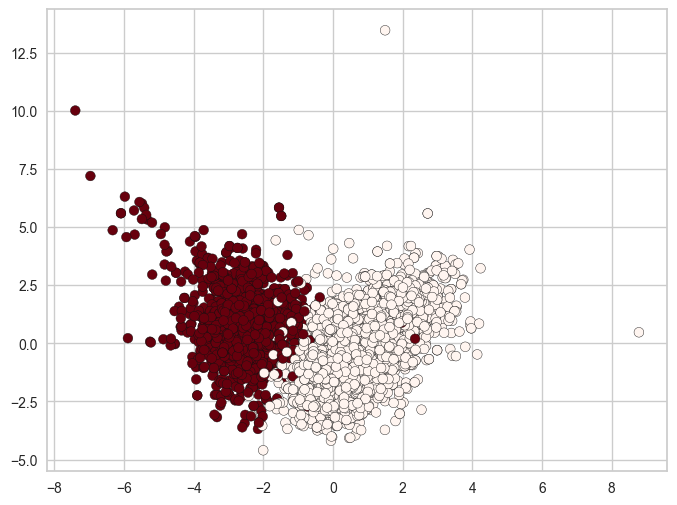

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(x=wines_transformed[:,0], y=wines_transformed[:,1], c=wines['color'], 
            edgecolor='k', cmap='Reds')
plt.grid(visible=True)

* Φαίνεται ότι οι δύο συστάδες αντιστοιχούν πάρα πολύ καλά στο χρώμα του κρασιού.

* Μόνο που οι συστάδες βεβαίως δεν ξέρουν ότι αναφέρονται σε χρώμα.

* Το 1 και το 0 των συστάδων είναι τα αντίστοιχα της στήλης `color` στα δεδομένα μας.

* Ας το επιβεβαιώσουμε.

In [15]:
import numpy as np
from sklearn import metrics

labels = np.where(kmeans.labels_ == 1, 1, 0)
metrics.accuracy_score(labels, wines['color'])

0.9861474526704633

* Προσοχή πάντα στην ερμηνεία των συστάδων!